In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot
from keras.utils import plot_model

Using TensorFlow backend.


# Train and Test Data from CIFAR10

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


In [19]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

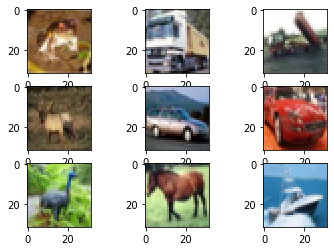

In [4]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

In [5]:
# Convert class target variable to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [0]:
#convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalise data by dividing by pixel max range value of 255
x_train /= 255
x_test /= 255






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


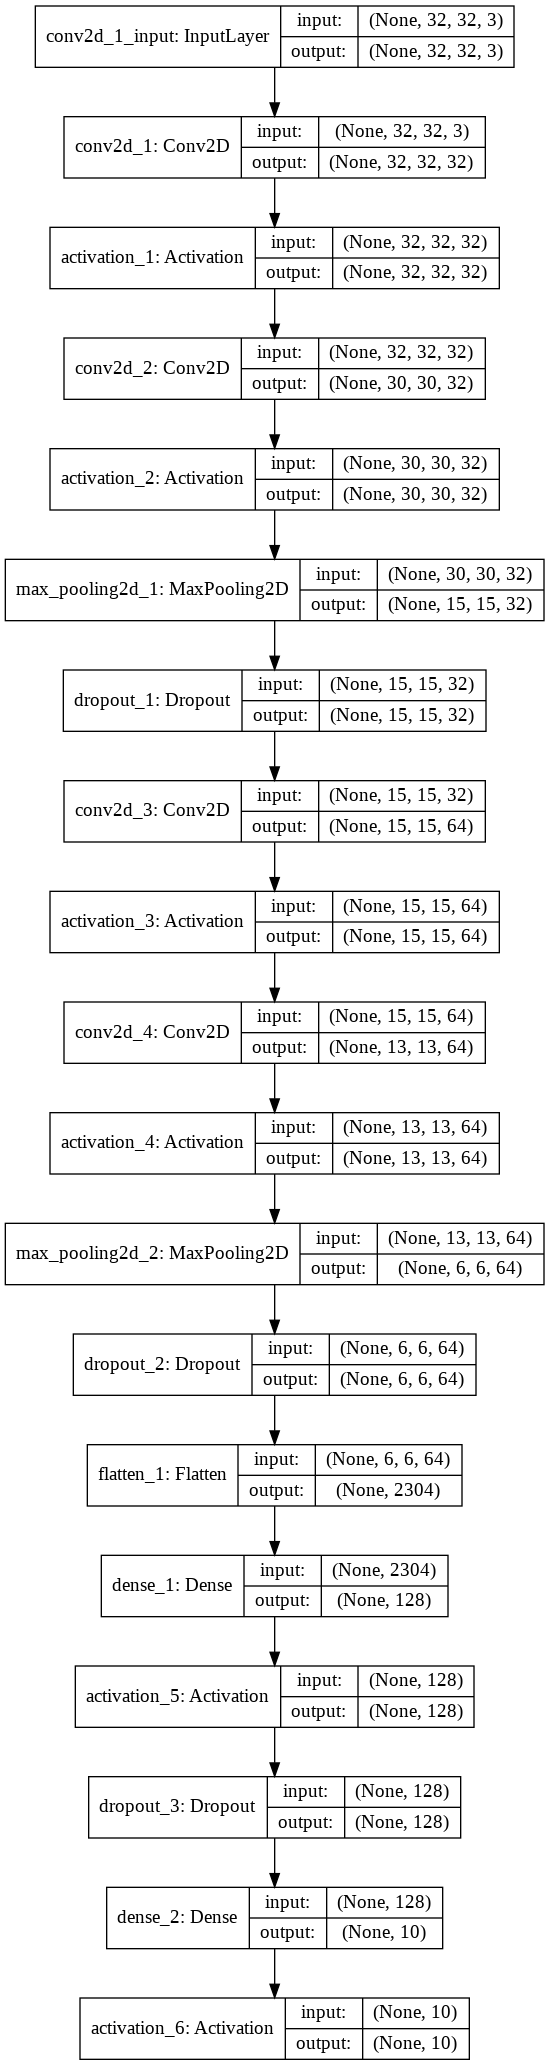

In [7]:
#creating model
#Convolutional layer with Rectified linear unit(Relu) activation
#32 convolution filters used each of size 3x3 and getting output same as input shape by doing padding (32,32,3)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Convolutional layer with Rectified linear unit(Relu) activation
#64 convolution filters used each of size 3x3 and getting output same as input shape by doing padding (32,32,3)
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Convolutional layer with Rectified linear unit(Relu) activation
#128 convolution filters used each of size 3x3 and getting output same as input shape by doing padding (32,32,3)
#model.add(Conv2D(128, (3, 3), padding='same'))
#model.add(Activation('relu'))
#model.add(Conv2D(128, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#Flatten since too many dimensions, we only want a classification output.
model.add(Flatten())

#Fully Connected to get all relevant data.
model.add(Dense(128))
model.add(Activation('relu'))

#One more dropout for convergence' sake. 
model.add(Dropout(0.5))
model.add(Dense(num_classes))

#output a Softmax to squash the matrix into output probabilities.
model.add(Activation('softmax'))

plot_model(model,to_file="model.png",show_shapes=True,rankdir='TB',expand_nested=True)

In [8]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
batch_size = 16
num_classes = 10
epochs = 40
#data_augmentation = True
num_predictions = 20

model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/40





50000/50000 [==============================] - 261s 5ms/step - loss: 1.6516 - acc: 0.4018 - val_loss: 1.2236 - val_acc: 0.5551
Epoch 2/40
50000/50000 [==============================] - 260s 5ms/step - loss: 1.2696 - acc: 0.5543 - val_loss: 1.0813 - val_acc: 0.6191
Epoch 3/40
50000/50000 [==============================] - 259s 5ms/step - loss: 1.1447 - acc: 0.6043 - val_loss: 1.0347 - val_acc: 0.6426
Epoch 4/40
50000/50000 [==============================] - 259s 5ms/step - loss: 1.0594 - acc: 0.6350 - val_loss: 0.9694 - val_acc: 0.6710
Epoch 5/40
19184/50000 [==========>...................] - ETA: 2:32 - loss: 1.0097 - acc: 0.6572

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])